In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [5]:
# Load the dataset
data = pd.read_csv('/content/Preprocessed_Missing_dataset.csv')
# Display the first few rows of the dataset
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,22 Years and 2 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [6]:
# Display summary statistics
print(data.describe())

# Check data types and info
print(data.info())

# Check for unique values in each column
print(data.nunique())

                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.303370   50505.123449            4199.890282           5.368800   
std        10.764915   38299.422093            3188.480516           2.593248   
min        14.000000    7005.930000             303.645417           0.000000   
25%        24.000000   19342.972500            1626.761667           3.000000   
50%        33.000000   36999.705000            3096.836667           5.000000   
75%        42.000000   71683.470000            5964.883333           7.000000   
max        56.000000  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  100000.000000        100000.000000   
mean          22.47443      72.466040       3.532880            21.092680   
std          129.05741     466.422621  

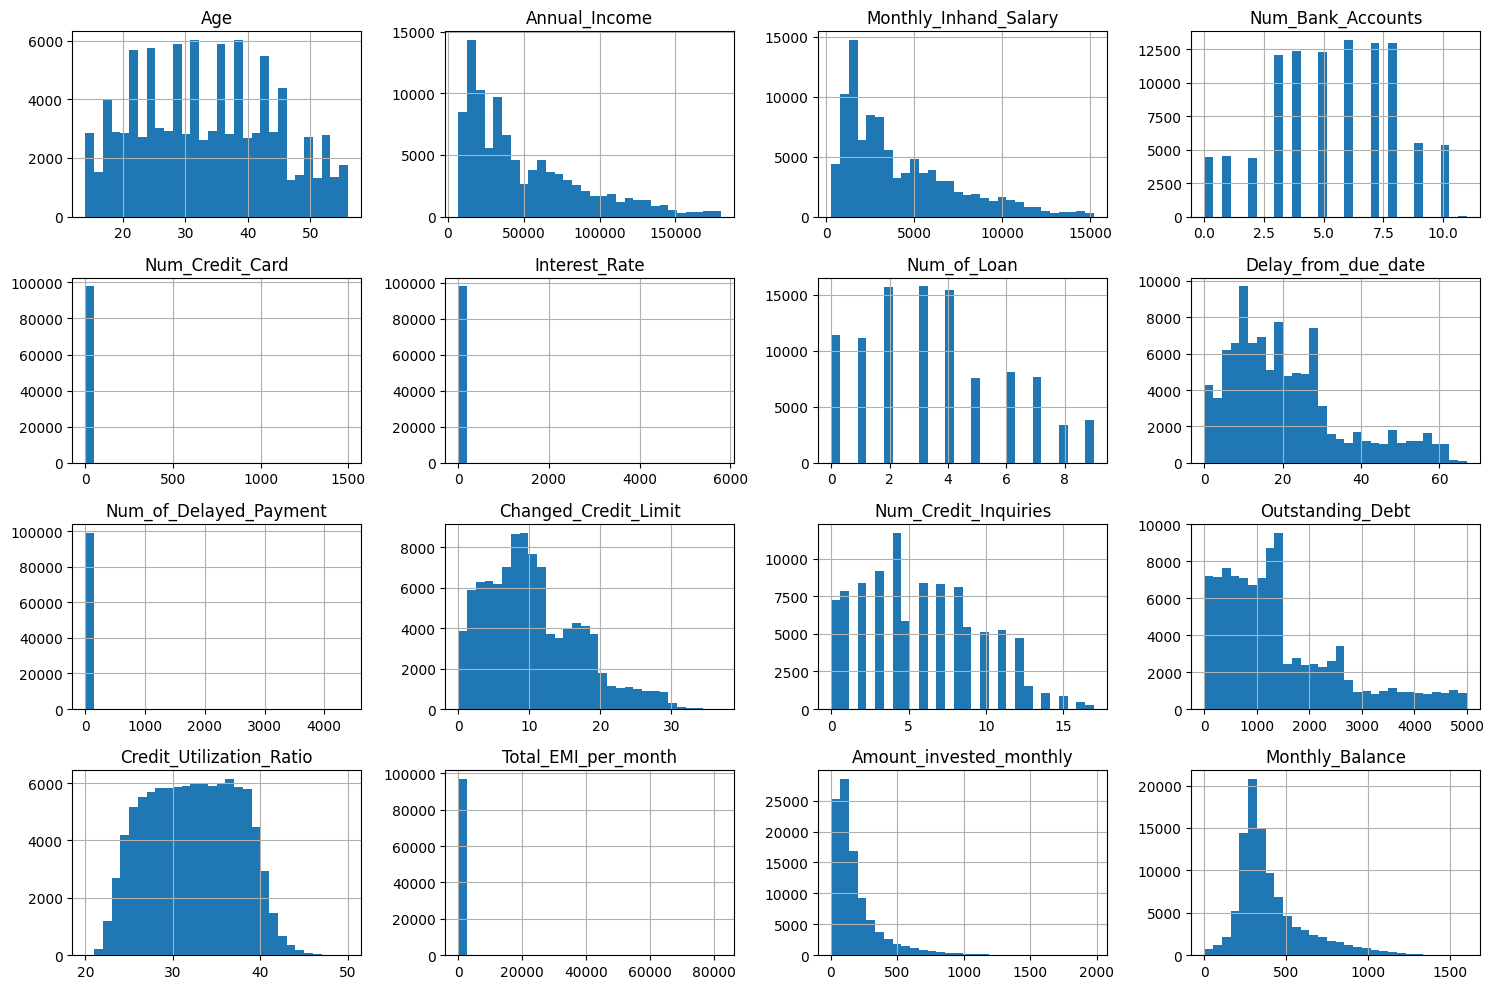

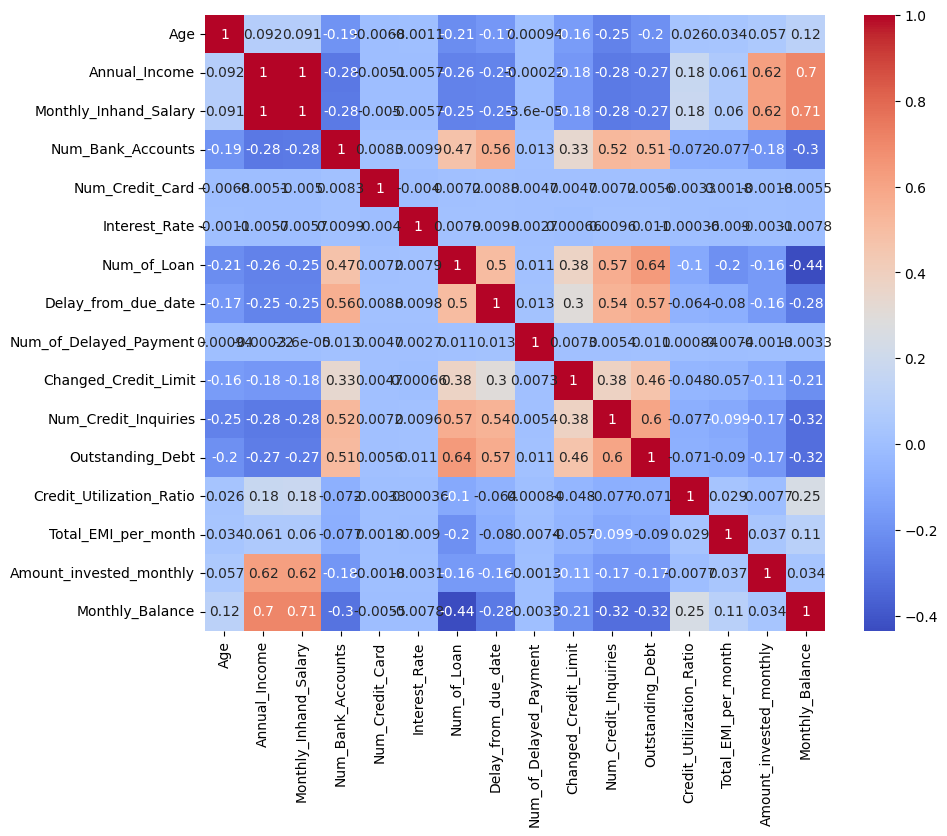

In [7]:
# Plotting histograms for all features
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


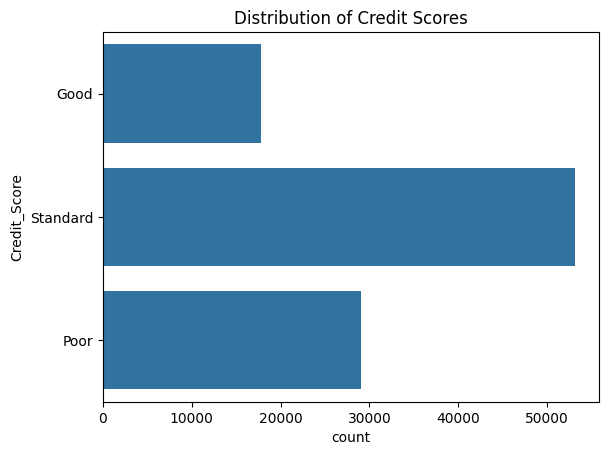

In [8]:
# Assuming 'Credit_Score' is the target column (adjust as needed)
sns.countplot(data['Credit_Score'])
plt.title('Distribution of Credit Scores')
plt.show()

In [9]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder

# Example of encoding multiple categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encoding specific categorical columns
label_encoder = LabelEncoder()
for col in ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']:  # Replace with actual categorical column names
    data[col] = label_encoder.fit_transform(data[col])

# Continue with your analysis and modeling
print(data.head())


      ID  Customer_ID  Month  Name  Age    SSN  Occupation  Annual_Income  \
0  16406        12320      3    84   23  10204          12       19114.12   
1  16417        12320      2    84   23  10204          12       19114.12   
2  16428        12320      6    84   23  10204          12       19114.12   
3  16441        12320      0    84   23  10204          12       19114.12   
4  16452        12320      7    84   23  10204          12       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0            1824.843333                  3  ...           1   
1            1824.843333                  3  ...           1   
2            1824.843333                  3  ...           1   
3            1824.843333                  3  ...           1   
4            1824.843333                  3  ...           1   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620                 186   
1            8

In [12]:
# Define the features (X) and target (y)
X = data.drop('Credit_Score', axis=1)  # All columns except the target
y = data['Credit_Score']  # The target column

# Check the shape of X and y to confirm the split
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (100000, 27)
Shape of y: (100000,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Initialize RandomForest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 10],
    'criterion': ['gini', 'entropy']
}

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
Best accuracy: 0.7306285714285713


In [19]:
# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define hyperparameters grid for tuning
gbc_param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

# Setup GridSearchCV for Gradient Boosting
# gbc_grid_search = GridSearchCV(estimator=gbc, param_grid=gbc_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gbc_grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=gbc_param_grid,
    cv=3,  # Reduce number of folds
    n_jobs=-1,
    scoring='accuracy'
)
# Fit the model
gbc_grid_search.fit(X_train, y_train)

# Print best parameters and best score for Gradient Boosting
print(f"Best parameters for GBC: {gbc_grid_search.best_params_}")
print(f"Best accuracy for GBC: {gbc_grid_search.best_score_}")

Best parameters for GBC: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
Best accuracy for GBC: 0.729885666625124


In [23]:
# Predictions using the best RandomForest model
rf_best = grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Performance metrics for RandomForest
print("RandomForest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

RandomForest Model Accuracy: 0.7298
Confusion Matrix:
 [[ 4044    82  1196]
 [  678  6030  2097]
 [ 2229  1824 11820]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.76      0.66      5322
           1       0.76      0.68      0.72      8805
           2       0.78      0.74      0.76     15873

    accuracy                           0.73     30000
   macro avg       0.71      0.73      0.71     30000
weighted avg       0.74      0.73      0.73     30000



In [20]:
# Predictions using the best GradientBoosting model
gbc_best = gbc_grid_search.best_estimator_
y_pred_gbc = gbc_best.predict(X_test)

# Performance metrics for Gradient Boosting
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))

Gradient Boosting Model Accuracy: 0.7317333333333333
Confusion Matrix:
 [[ 3763    86  1473]
 [  493  5982  2330]
 [ 1764  1902 12207]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.66      5322
           1       0.75      0.68      0.71      8805
           2       0.76      0.77      0.77     15873

    accuracy                           0.73     30000
   macro avg       0.71      0.72      0.71     30000
weighted avg       0.73      0.73      0.73     30000



Random Forest ROC-AUC: 0.8728681390457836
Gradient Boosting ROC-AUC: 0.8739737432153131


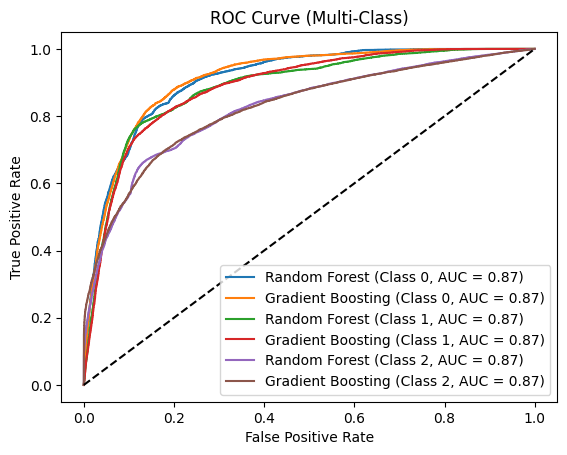

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC using multi-class setting
rf_roc_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test), multi_class='ovr')
gbc_roc_auc = roc_auc_score(y_test, gbc_best.predict_proba(X_test), multi_class='ovr')

print(f"Random Forest ROC-AUC: {rf_roc_auc}")
print(f"Gradient Boosting ROC-AUC: {gbc_roc_auc}")

# Since you are dealing with multi-class classification, plotting ROC curves separately for each class
for i in range(len(rf_best.classes_)):
    rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_best.predict_proba(X_test)[:, i], pos_label=rf_best.classes_[i])
    gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_best.predict_proba(X_test)[:, i], pos_label=gbc_best.classes_[i])

    plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (Class {i}, AUC = {rf_roc_auc:.2f})')
    plt.plot(gbc_fpr, gbc_tpr, label=f'Gradient Boosting (Class {i}, AUC = {gbc_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-Class)')
plt.legend(loc='lower right')
plt.show()


In [27]:
import pickle

# Save the best RandomForest model
with open('random_forest_credit_score_model.pkl', 'wb') as file:
    pickle.dump(rf_best, file)

# Save the best GradientBoosting model
with open('gradient_boosting_credit_score_model.pkl', 'wb') as file:
    pickle.dump(gbc_best, file)


In [28]:
from google.colab import files

# Download RandomForest model
files.download('random_forest_credit_score_model.pkl')

# Download GradientBoosting model
files.download('gradient_boosting_credit_score_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>